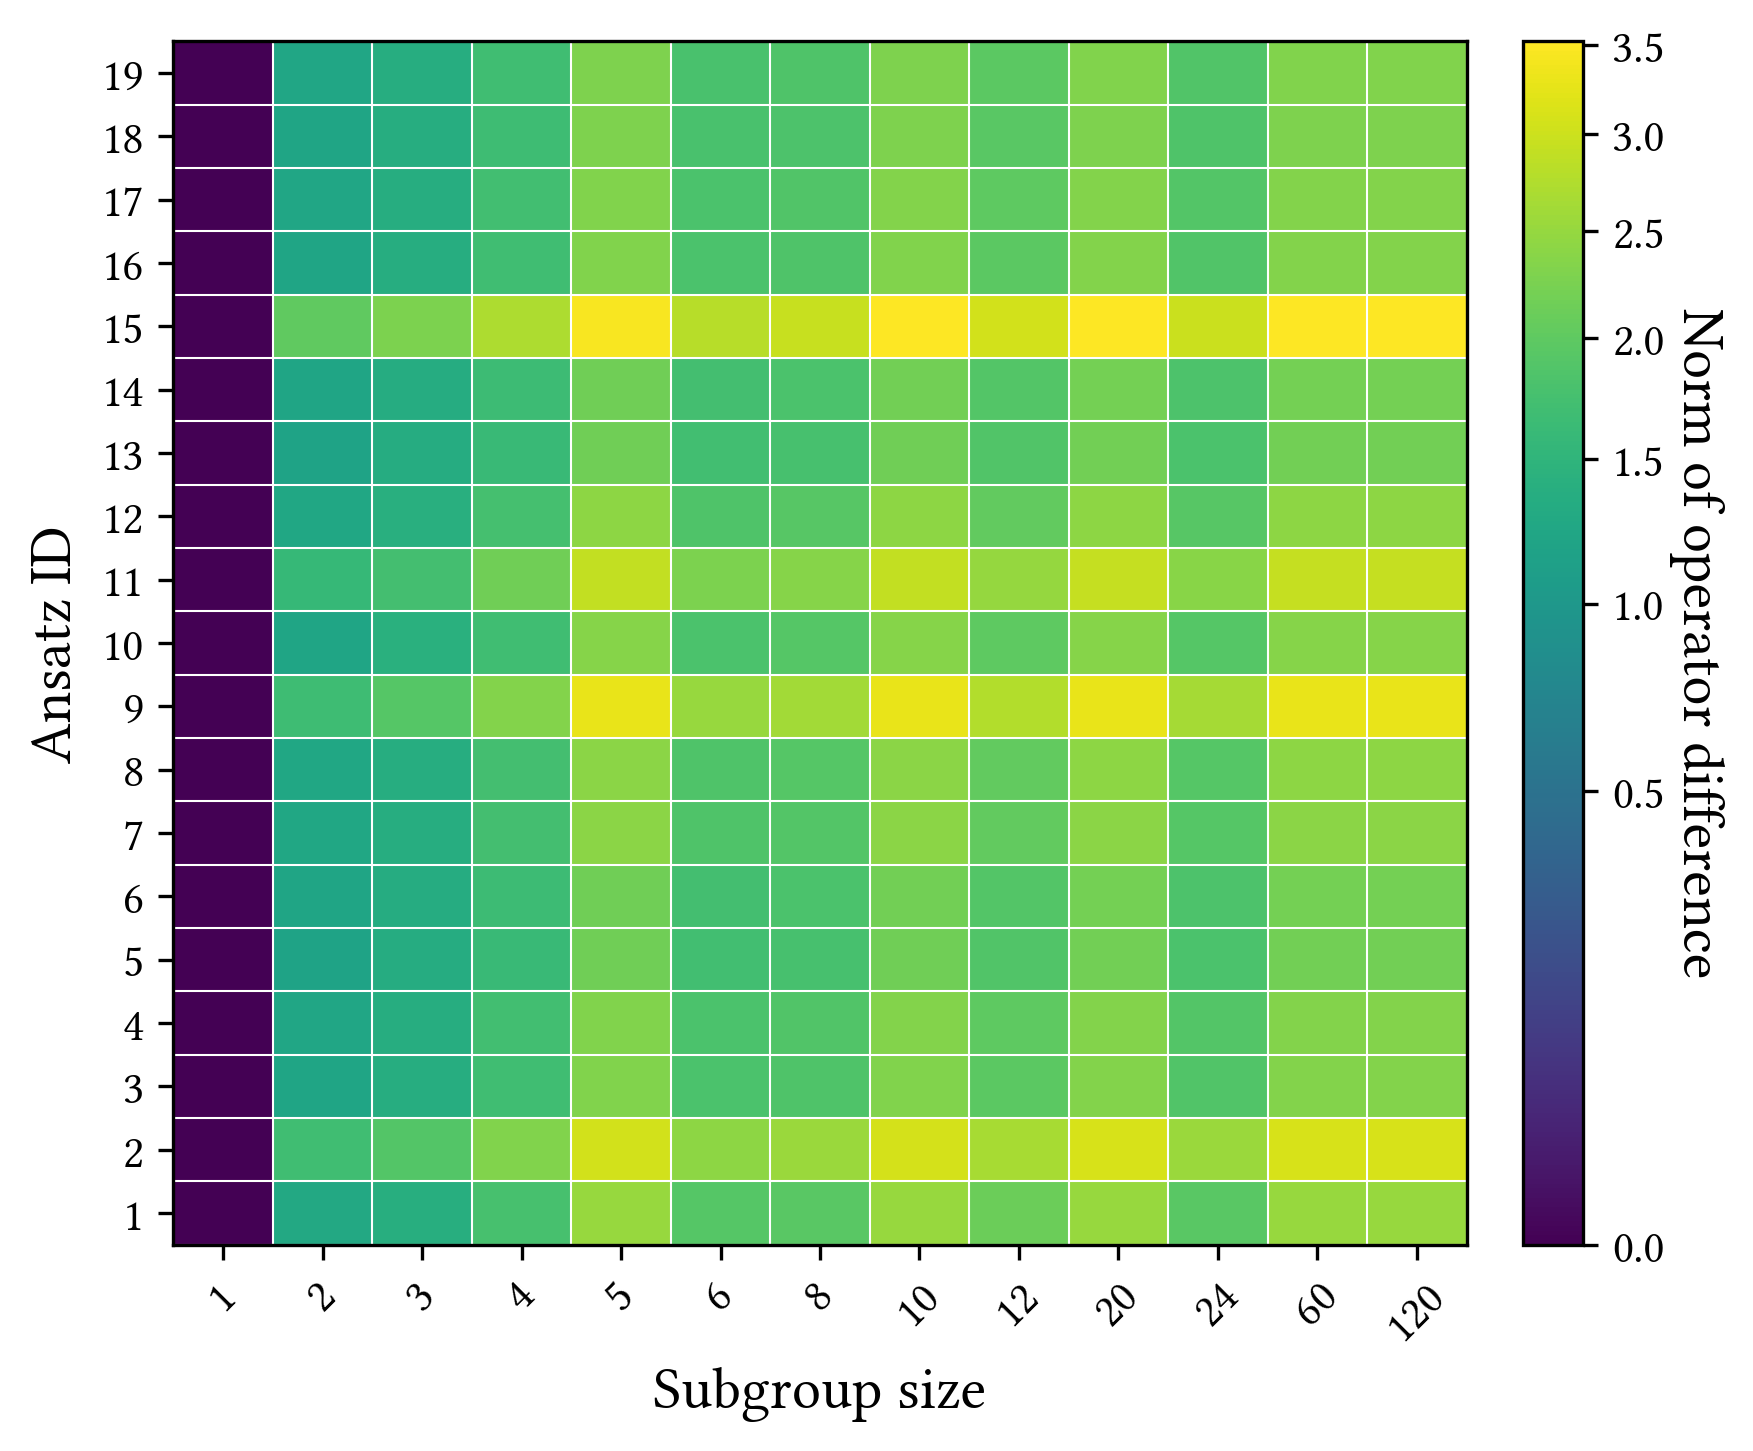

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.colors import PowerNorm

# ====== Font configuration (Linux Libertine) ======
# Make sure the font file LinLibertine_R.ttf is in your working directory or specify its full path
font_path = "C:\\Users\\valte\\OneDrive - University of Helsinki\\Desktop\\linux_libertine\\LinLibertine_R.ttf"
font_manager.fontManager.addfont(font_path)
plt.rcParams.update({
    "font.family": "Linux Libertine",
    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "figure.dpi": 300,
    "axes.linewidth": 0.8,
    "axes.edgecolor": "black"
})

# ====== Parameters described by the user ======
layers = list(range(1,6))
ansatzes = list(range(1,20))
n_qubits = 5
with open(f"../groups/subgroups_{n_qubits}.json", "r") as f:
    subgroups = json.load(f)
subgroups = [int(k) for k in subgroups.keys()]

data = None
path = f'../results/results_projection_onto_symmetric_subspace_{n_qubits}.json'
with open(path, 'r') as file:
    data = json.load(file)

# ====== Prepare data for DataFrame ======
data_records = []
for layer in layers:
    for ans in ansatzes:
        for s in subgroups:
            value = data[str(n_qubits)][str(layer)][str(ans)][str(s)]
            data_records.append({"layer": layer, "ansatz": ans, "subgroup": s, "value": float(value)})

df = pd.DataFrame.from_records(data_records)

# ====== Choose which layer to plot ======
layer_to_plot = 1
subset = df[df["layer"] == layer_to_plot]

# Pivot for heatmap
pivot = subset.pivot(index="ansatz", columns="subgroup", values="value")

# ====== Plot ======
fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(pivot, aspect="auto", origin="lower", cmap="viridis")

# Labels and title
ax.set_xlabel("Subgroup size")
ax.set_ylabel("Ansatz ID")

# Ticks
ax.set_xticks(range(len(pivot.columns)))
ax.set_xticklabels(pivot.columns, rotation=45)
ax.set_yticks(range(len(pivot.index)))
ax.set_yticklabels(pivot.index)

# Add subtle gridlines for readability
ax.set_xticks(np.arange(-0.5, len(pivot.columns), 1), minor=True)
ax.set_yticks(np.arange(-0.5, len(pivot.index), 1), minor=True)
ax.grid(which="minor", color="white", linestyle="-", linewidth=0.5)
ax.tick_params(which="minor", bottom=False, left=False)

# Colorbar with normalization to emphasize small differences
im.set_norm(PowerNorm(gamma=0.5, vmin=pivot.min().min(), vmax=pivot.max().max()))
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_ylabel("Norm of operator difference", rotation=270, labelpad=14)

plt.tight_layout()
plt.show()
